In [10]:
# diplaying the hadoop output files ( .txt )
carrier_df = pd.read_csv("delay-per-carrier.txt", sep="\t", header=None, names=["CarrierCode", "TotalDelay"])
airport_df = pd.read_csv("delay-per-airport.txt", sep="\t", header=None, names=["AirportCode", "TotalDelay"])

# Display first few rows of each DataFrame
print("Delay per Airline Carrier (from Hadoop Output):")
display(carrier_df.head(10))   # shows top 10 rows

print("\n Delay per Airport (from Hadoop Output):")
display(airport_df.head(10))   # shows top 10 rows

Delay per Airline Carrier (from Hadoop Output):


,CarrierCode,TotalDelay
0,9E,2710.0
1,AA,20878.0
2,AS,5184.0
3,B6,7782.0
4,DL,16557.0
5,EV,8678.0
6,F9,1798.0
7,FL,251.0
8,G4,1796.0
9,HA,682.0



 Delay per Airport (from Hadoop Output):


,AirportCode,TotalDelay
0,ABE,100.0
1,ABI,26.0
2,ABQ,287.0
3,ABR,27.0
4,ABY,31.0
5,ACK,69.0
6,ACT,14.0
7,ACV,192.0
8,ACY,49.0
9,ADK,4.0


In [11]:
# -------------------------------------------------------------
# ✈️  FLIGHT DELAY ANALYSIS USING HADOOP OUTPUTS
# -------------------------------------------------------------
# We'll visualize the Hadoop job results:
#   1️⃣ Total delay per airline carrier
#   2️⃣ Total delay per airport
#
# Files you should upload in Colab:
#   - DelayedFlights.csv
#   - delay-per-carrier.txt
#   - delay-per-airport.txt
# -------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

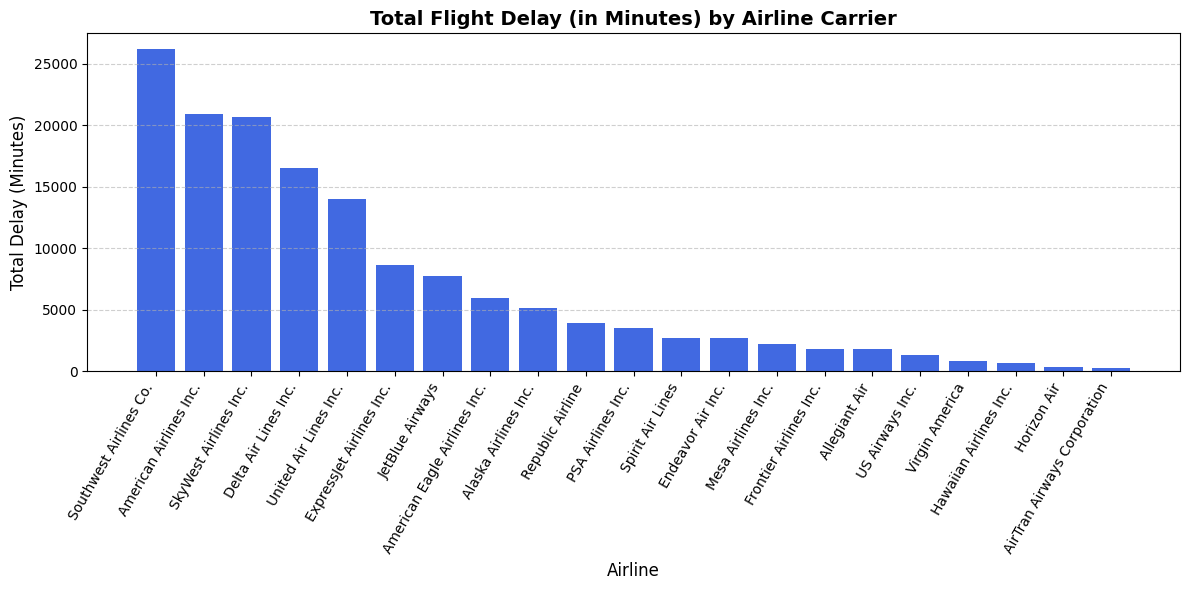

,carrier,total_delay,carrier_name
18,WN,26147.0,Southwest Airlines Co.
1,AA,20878.0,American Airlines Inc.
13,OO,20659.0,SkyWest Airlines Inc.
4,DL,16557.0,Delta Air Lines Inc.
15,UA,14038.0,United Air Lines Inc.


In [15]:
# -------------------------------------------------------------
# STEP 1 — Read the Hadoop output (carrier-wise delay)
# -------------------------------------------------------------
# The Hadoop output contains simple key-value pairs like:
# AA    20878.0
# So we’ll read it using tab as the separator.
# -------------------------------------------------------------
carrier_df = pd.read_csv(
    "delay-per-carrier.txt", sep="\t", header=None, names=["carrier", "total_delay"]
)

# -------------------------------------------------------------
# STEP 2 — Read the main dataset to get airline names
# -------------------------------------------------------------
# Our main CSV file has the following relevant columns:
#   - carrier (airline code)
#   - carrier_name (full airline name)
# We’ll build a small dictionary to map carrier → full name.
# -------------------------------------------------------------
flights_df = pd.read_csv("DelayedFlights.csv")
carrier_map = dict(zip(flights_df["carrier"], flights_df["carrier_name"]))

# Add readable names to the Hadoop result
carrier_df["carrier_name"] = carrier_df["carrier"].map(carrier_map)

# -------------------------------------------------------------
# STEP 3 — Sort to find airlines with the largest total delay
# -------------------------------------------------------------
carrier_df = carrier_df.sort_values(by="total_delay", ascending=False)

# -------------------------------------------------------------
# STEP 4 — Plot the results
# -------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.bar(carrier_df["carrier_name"], carrier_df["total_delay"], color="royalblue")

plt.title("Total Flight Delay (in Minutes) by Airline Carrier", fontsize=14, weight="bold")
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Total Delay (Minutes)", fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# downloading the plot images
plt.savefig("carrier_delay_plot.png", dpi=300, bbox_inches="tight")
from google.colab import files
files.download("carrier_delay_plot.png")

plt.show()



# View top 5 airlines with most delays
carrier_df.head(5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

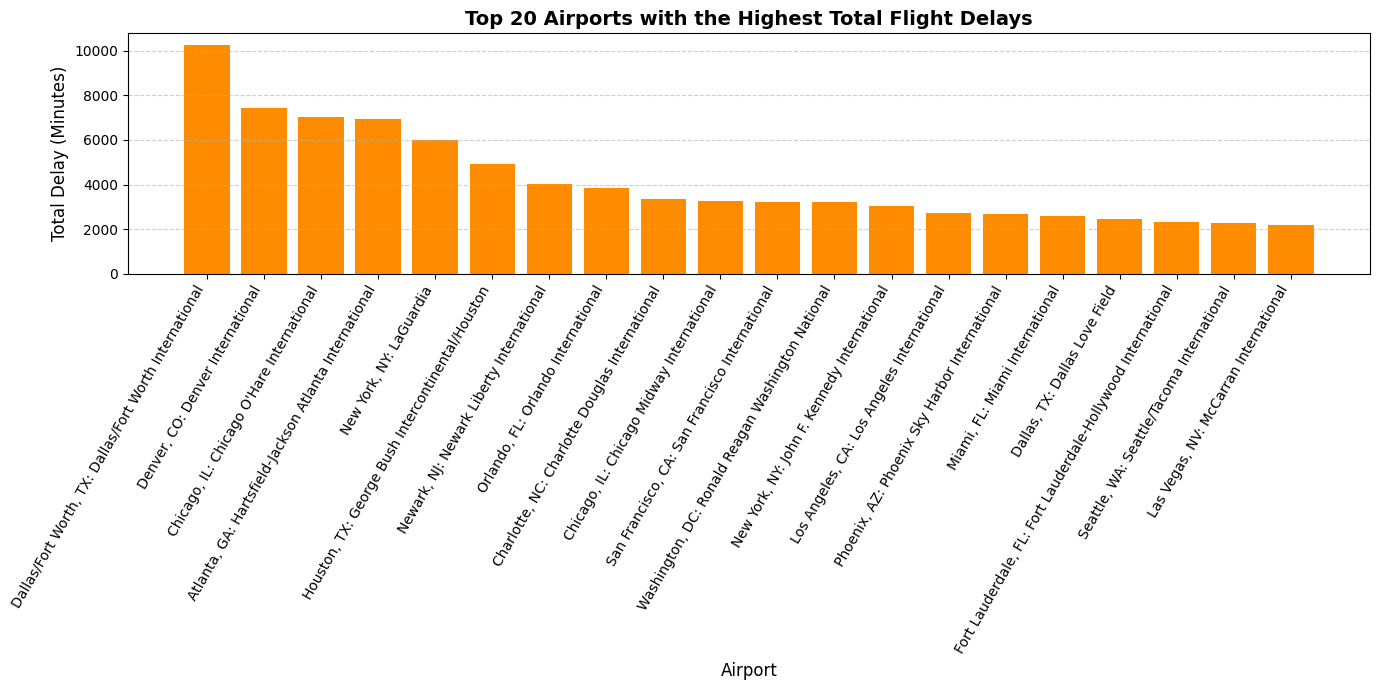

,airport,total_delay,airport_name
101,DFW,10271.0,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
100,DEN,7426.0,"Denver, CO: Denver International"
262,ORD,7017.0,"Chicago, IL: Chicago O'Hare International"
23,ATL,6953.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
211,LGA,6004.0,"New York, NY: LaGuardia"


In [16]:
# -------------------------------------------------------------
# STEP 1 — Read the Hadoop output (airport-wise delay)
# -------------------------------------------------------------
# This file has airport code and total delay, like:
# ATL    6953.0
# -------------------------------------------------------------
airport_df = pd.read_csv(
    "delay-per-airport.txt", sep="\t", header=None, names=["airport", "total_delay"]
)

# -------------------------------------------------------------
# STEP 2 — Use the main dataset to get airport names
# -------------------------------------------------------------
# The CSV file contains both "airport" and "airport_name".
# We'll use that to replace codes with human-readable names.
# -------------------------------------------------------------|
airport_map = dict(zip(flights_df["airport"], flights_df["airport_name"]))
airport_df["airport_name"] = airport_df["airport"].map(airport_map)

# -------------------------------------------------------------
# STEP 3 — Focus on the top 20 airports with the highest delays
# -------------------------------------------------------------
top20_airports = airport_df.sort_values(by="total_delay", ascending=False).head(20)

# -------------------------------------------------------------
# STEP 4 — Plot bar chart for top 20 airports
# -------------------------------------------------------------
plt.figure(figsize=(14,7))
plt.bar(top20_airports["airport_name"], top20_airports["total_delay"], color="darkorange")

plt.title("Top 20 Airports with the Highest Total Flight Delays", fontsize=14, weight="bold")
plt.xlabel("Airport", fontsize=12)
plt.ylabel("Total Delay (Minutes)", fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# downloading the plot images as png formt
plt.savefig("airport_delay_plot.png", dpi=300, bbox_inches="tight")
from google.colab import files
files.download("airport_delay_plot.png")

plt.show()



# View top 5 most delay-prone airports
top20_airports.head(5)
